# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)
 
### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

# Loading Essential Libraries

In [2]:
#@title Code - Load dependencies

#general
import io

# data
import numpy as np
import pandas as pd # type: ignore

# machine learning
import keras # type: ignore

# data visualization
import plotly.express as px # type: ignore
from plotly.subplots import make_subplots # type: ignore
import plotly.graph_objects as go # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt   # type: ignore
from sklearn.cluster import KMeans # type: ignore

# Loading Data to Dataframe using Pandas

In [3]:
# @title
ecommerce_dataset = pd.read_csv("C:\\Users\\dhawa\\OneDrive\\Desktop\\ElevateMe Project 1\\ecommerce_data.csv", encoding='cp1252')


# Exploring the loaded data 

In [4]:
# View the first few rows of the dataset
print(ecommerce_dataset.head())

# Get a summary of the dataset
print(ecommerce_dataset.info())

# Get basic statistics for numerical columns
print(ecommerce_dataset.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

# Check for Null values within the loaded data

In [5]:
# Check for missing values
print(ecommerce_dataset.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


# Getting properties of each coloumn within the Loaded data 

In [6]:
print(ecommerce_dataset['InvoiceNo'].describe())

count     541909
unique     25900
top       573585
freq        1114
Name: InvoiceNo, dtype: object


In [7]:
print(ecommerce_dataset['StockCode'].describe())

count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object


In [8]:
print(ecommerce_dataset['Description'].describe())

count                                 540455
unique                                  4223
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2369
Name: Description, dtype: object


In [9]:
print(ecommerce_dataset['InvoiceDate'].describe())

count               541909
unique               23260
top       10/31/2011 14:41
freq                  1114
Name: InvoiceDate, dtype: object


In [10]:
print(ecommerce_dataset['Quantity'].describe())

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


In [11]:
print(ecommerce_dataset['UnitPrice'].describe())

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


In [12]:
print(ecommerce_dataset['CustomerID'].describe())

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64


# Loading the original data to experimental dataframe for analysis 

In [13]:
ecommerce_dataset_cleaned = ecommerce_dataset

# Box Plot Analysis of 'Quantity': Distribution, Variability, and Outliers

1.0 3.0 10.0 9.0


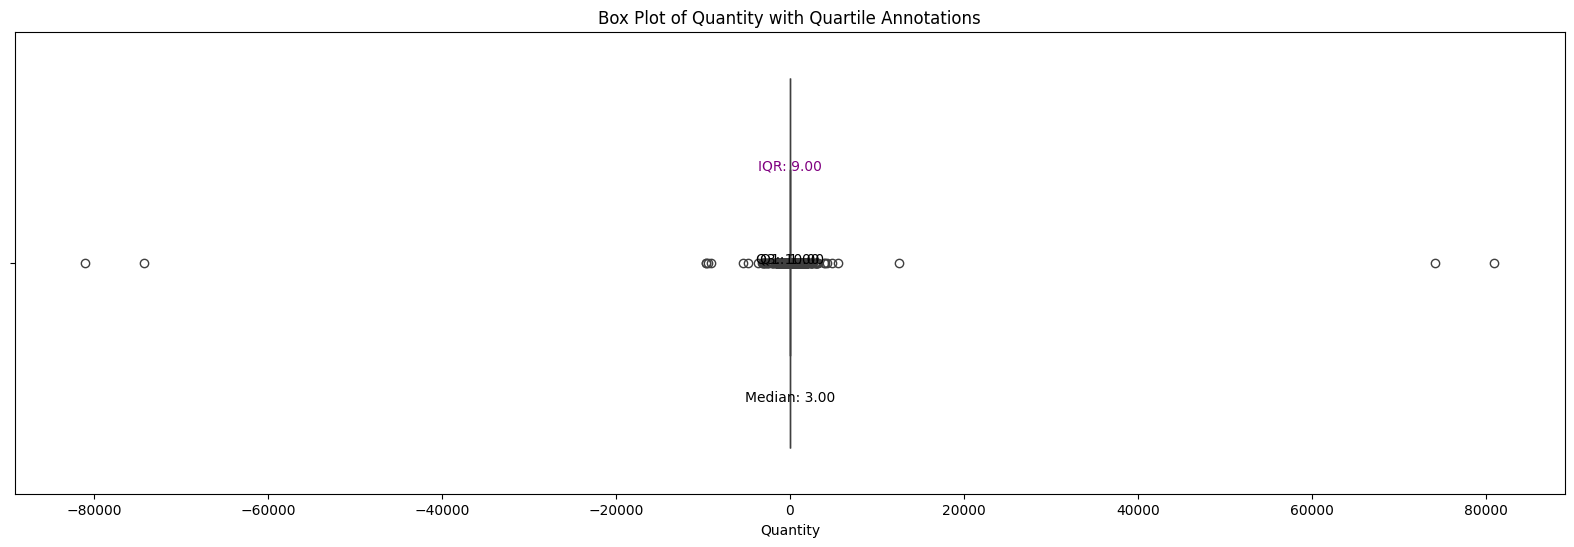

In [14]:
data = ecommerce_dataset_cleaned['Quantity']

# Calculate Q1, Q2, Q3, and IQR
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Plot box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x=data)
plt.title('Box Plot of Quantity with Quartile Annotations')
#print values
print(Q1,Q2,Q3,IQR)
# Annotate Q1, Q2, Q3, and IQR
plt.text(Q1, 0, f'Q1: {Q1:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(Q2, 0.3, f'Median: {Q2:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(Q3, 0, f'Q3: {Q3:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(Q1 + IQR/2, -0.2, f'IQR: {IQR:.2f}', horizontalalignment='center', color='purple', fontsize=10)

# Display the plot
plt.show()

# Cleaning Incorrect values outside IQR

In [15]:
ecommerce_dataset_cleaned = ecommerce_dataset_cleaned[(ecommerce_dataset_cleaned['Quantity'] >= Q1)]

In [16]:
ecommerce_dataset_cleaned = ecommerce_dataset_cleaned[(ecommerce_dataset_cleaned['Quantity'] <= Q3)]

In [17]:
print(ecommerce_dataset_cleaned['Quantity'].describe())

count    398654.000000
mean          3.130083
std           2.583893
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Quantity, dtype: float64


# Box Plot Analysis of 'UnitPrice': Distribution, Variability, and Outliers

1.63 2.55 4.95 9.0


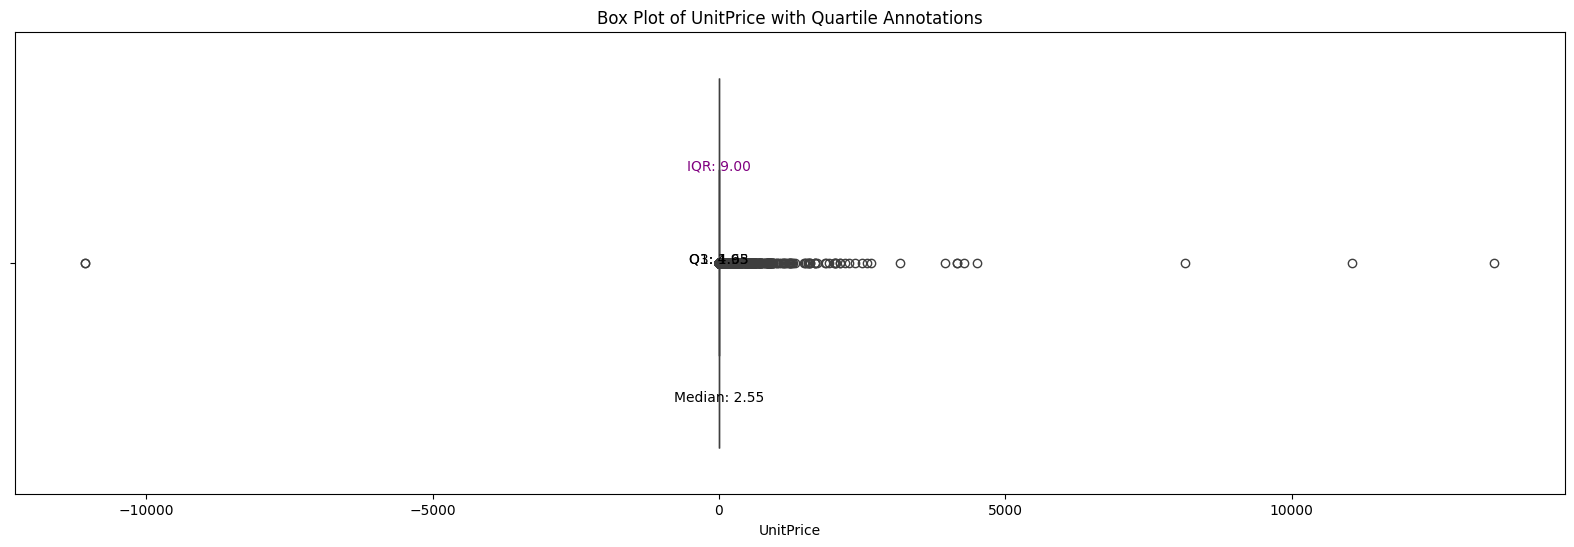

In [18]:
data = ecommerce_dataset_cleaned['UnitPrice']

# Calculate Q1, Q2, Q3, and IQR
uQ1 = np.percentile(data, 25)
uQ2 = np.percentile(data, 50)
uQ3 = np.percentile(data, 75)
uIQR = Q3 - Q1
#print values
print(uQ1,uQ2,uQ3,uIQR)
# Plot box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x=data)
plt.title('Box Plot of UnitPrice with Quartile Annotations')

# Annotate Q1, Q2, Q3, and IQR
plt.text(uQ1, 0, f'Q1: {uQ1:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(uQ2, 0.3, f'Median: {uQ2:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(uQ3, 0, f'Q3: {uQ3:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(uQ1 + uIQR/2, -0.2, f'IQR: {uIQR:.2f}', horizontalalignment='center', color='purple', fontsize=10)

# Display the plot
plt.show()

# Cleaning Incorrect values outside IQR

In [19]:
ecommerce_dataset_cleaned = ecommerce_dataset_cleaned[(ecommerce_dataset_cleaned['UnitPrice'] >= uQ1 )] 

In [20]:
ecommerce_dataset_cleaned = ecommerce_dataset_cleaned[(ecommerce_dataset_cleaned['UnitPrice'] <= uQ3 )]

In [21]:
print(ecommerce_dataset_cleaned['UnitPrice'].describe())

count    220165.000000
mean          2.900183
std           1.042228
min           1.630000
25%           2.080000
50%           2.550000
75%           3.750000
max           4.950000
Name: UnitPrice, dtype: float64


# Replacing null values with the default value 

In [22]:
ecommerce_dataset_cleaned['Description'] = ecommerce_dataset_cleaned['Description'].fillna('No Description Available')

# Dropping null values 

In [23]:
ecommerce_dataset_cleaned = ecommerce_dataset_cleaned.dropna(subset=['CustomerID'])

# Validating data

In [24]:
negative_count = ((ecommerce_dataset_cleaned['Quantity'] < 0) | (ecommerce_dataset_cleaned['UnitPrice']<0)).sum()
print(negative_count)
print(ecommerce_dataset_cleaned[(ecommerce_dataset_cleaned['Quantity'] < 0) | (ecommerce_dataset_cleaned['UnitPrice']<0)])

0
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [25]:
print(ecommerce_dataset_cleaned.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# Exploring Cleaned Data

In [26]:
# View the first few rows of the dataset
print(ecommerce_dataset_cleaned.head())

# Get a summary of the dataset
print(ecommerce_dataset_cleaned.info())

# Get basic statistics for numerical columns
print(ecommerce_dataset_cleaned.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
Index: 152771 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    1527

# Encoding categorical variables and transforming data types

In [27]:
ecommerce_dataset_cleaned['InvoiceDate'] = pd.to_datetime(ecommerce_dataset_cleaned['InvoiceDate'])

In [28]:
ecommerce_dataset_cleaned['Quantity'] = ecommerce_dataset_cleaned['Quantity'].astype('Int64')

In [29]:
ecommerce_dataset_cleaned['Description'] = ecommerce_dataset_cleaned['Description'].astype('string')

In [30]:
ecommerce_dataset_cleaned['StockCode'] = ecommerce_dataset_cleaned['StockCode'].astype('category')

In [31]:
ecommerce_dataset_cleaned['InvoiceNo'] = ecommerce_dataset_cleaned['InvoiceNo'].astype('category')

In [32]:
ecommerce_dataset_cleaned['CustomerID'] = ecommerce_dataset_cleaned['CustomerID'].astype('category')

# Feature Engineering

In [33]:
ecommerce_dataset_cleaned['Date_since_last_purchase'] = ecommerce_dataset_cleaned.groupby('CustomerID', observed=False)['InvoiceDate'].transform(lambda x: (x.max() - x).dt.days)

ecommerce_dataset_cleaned['Total_spent'] = ecommerce_dataset_cleaned['Quantity']*ecommerce_dataset_cleaned['UnitPrice']


# Calculating features and EDA 

In [34]:
customer_spend = ecommerce_dataset_cleaned.groupby('CustomerID', observed=False)['Total_spent'].sum().reset_index()

avg_order_value = ecommerce_dataset_cleaned.groupby('CustomerID', observed=False)['Total_spent'].mean().reset_index()

product_diversity = ecommerce_dataset_cleaned.groupby('CustomerID', observed=False)['StockCode'].nunique().reset_index()

purchase_frequency = ecommerce_dataset_cleaned.groupby('CustomerID', observed=False)['InvoiceNo'].nunique().reset_index()


- Details for newly created features

In [35]:
print(customer_spend.describe(),avg_order_value.describe(),product_diversity.describe(),purchase_frequency.describe())

       Total_spent
count       3929.0
mean    431.509639
std     886.630071
min           1.65
25%          87.65
50%         198.05
75%         479.65
max       31198.03        Total_spent
count       3929.0
mean     14.239138
std       6.089544
min           1.65
25%           8.75
50%         16.178
75%      17.921875
max           49.5          StockCode
count  3929.000000
mean     26.221685
std      37.226887
min       1.000000
25%       6.000000
50%      14.000000
75%      33.000000
max     735.000000          InvoiceNo
count  3929.000000
mean      3.657674
std       6.202550
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max     172.000000


# Distribution of Quantity: Classifying Customers by Purchase Volume

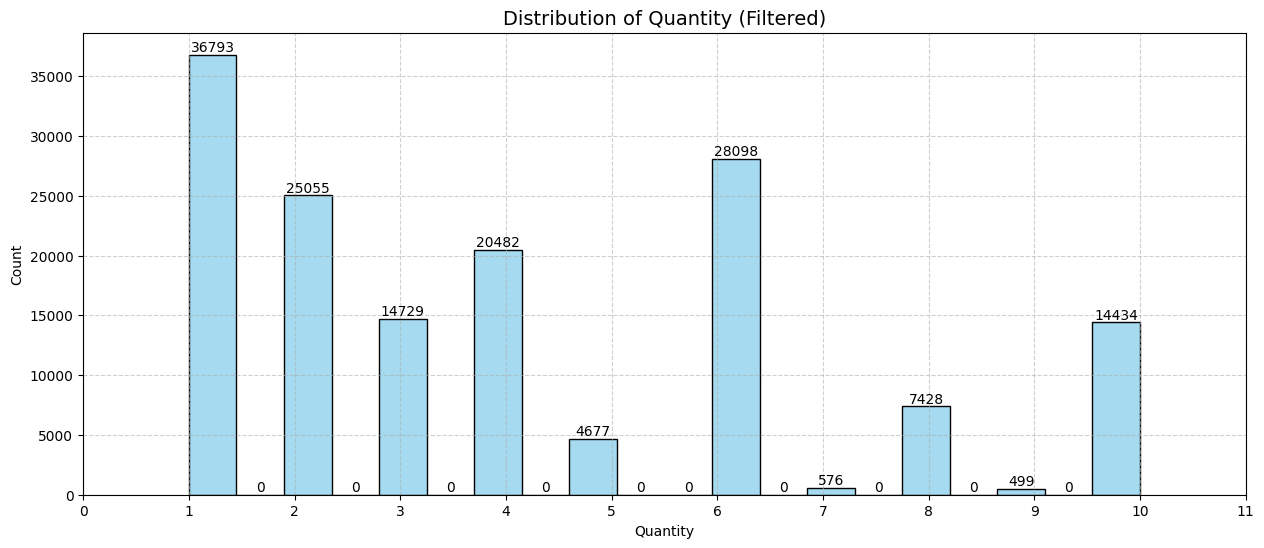

In [36]:
df_filtered = ecommerce_dataset_cleaned
#df_filtered = df_filtered[df_filtered['Quantity']<df_filtered['Quantity'].quantile(0.99)]
plt.figure(figsize=(15, 6))
ax= sns.histplot(df_filtered['Quantity'], bins=20, kde=False, color='skyblue', edgecolor='black')
max_quantity_purchased = df_filtered['Quantity'].max()
# Set x-axis ticks to be in the range of 0 to 100 with steps of 10
plt.xticks(range(0, max_quantity_purchased + 2,1))
# Annotate each bar with the count value
for p in ax.patches:
    # Get the height of each bar (count value)
    height = p.get_height()
    
    # Annotate the bar with the count value
    ax.text(p.get_x() + p.get_width() / 2, height + 0.2, int(height), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Quantity (Filtered)', fontsize=14)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Distribution of Total Spending: Classifying Customers by Spending Behavior

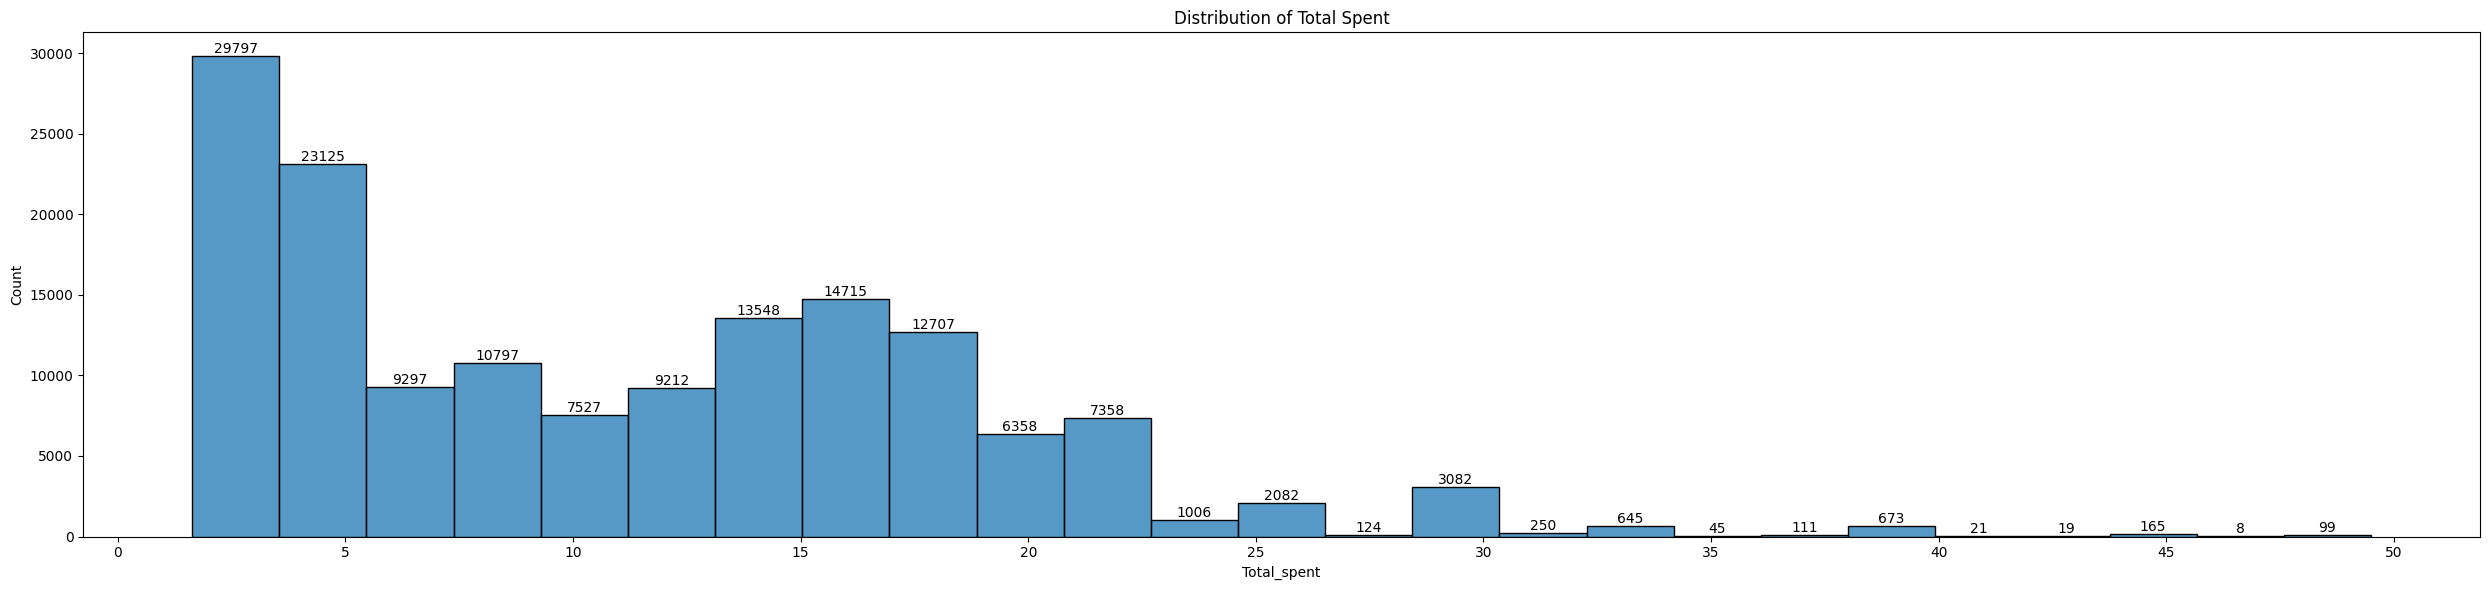

In [37]:
dts = ecommerce_dataset_cleaned
#dts = dts[dts['Total_spent']<dts['Total_spent'].quantile(0.99)]
plt.figure(figsize=(25, 6))
ax=sns.histplot(dts['Total_spent'], bins=25, kde=False)
max_total_spent = dts['Total_spent'].max()
plt.xticks(range(0, int(max_total_spent)+5, 5))
# Annotate each bar with the count value
for p in ax.patches:
    # Get the height of each bar (count value)
    height = p.get_height()
    
    # Annotate the bar with the count value
    ax.text(p.get_x() + p.get_width() / 2, height + 0.2, int(height), ha='center', va='bottom', fontsize=10)


plt.title('Distribution of Total Spent')
plt.tight_layout()
plt.show()

# Feature Correlation Matrix: Visualizing Interrelationships Among Features

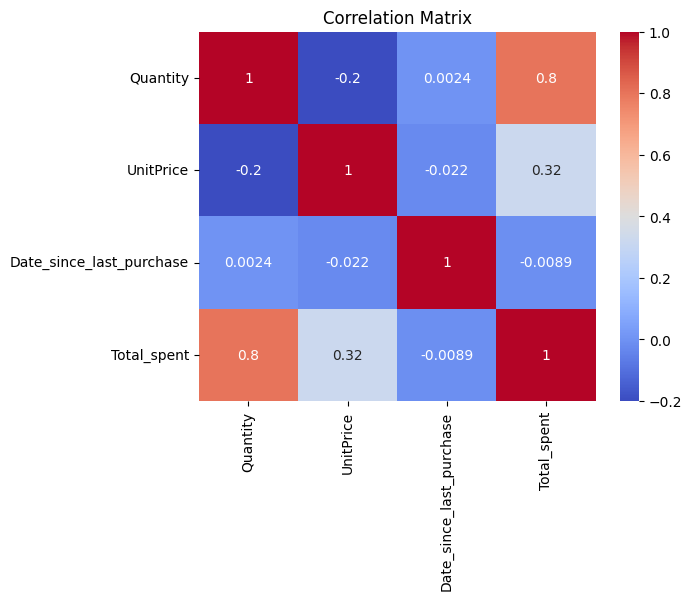

In [38]:
numeric_df = ecommerce_dataset_cleaned.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Customer Distribution: Total Spent vs Purchase Frequency

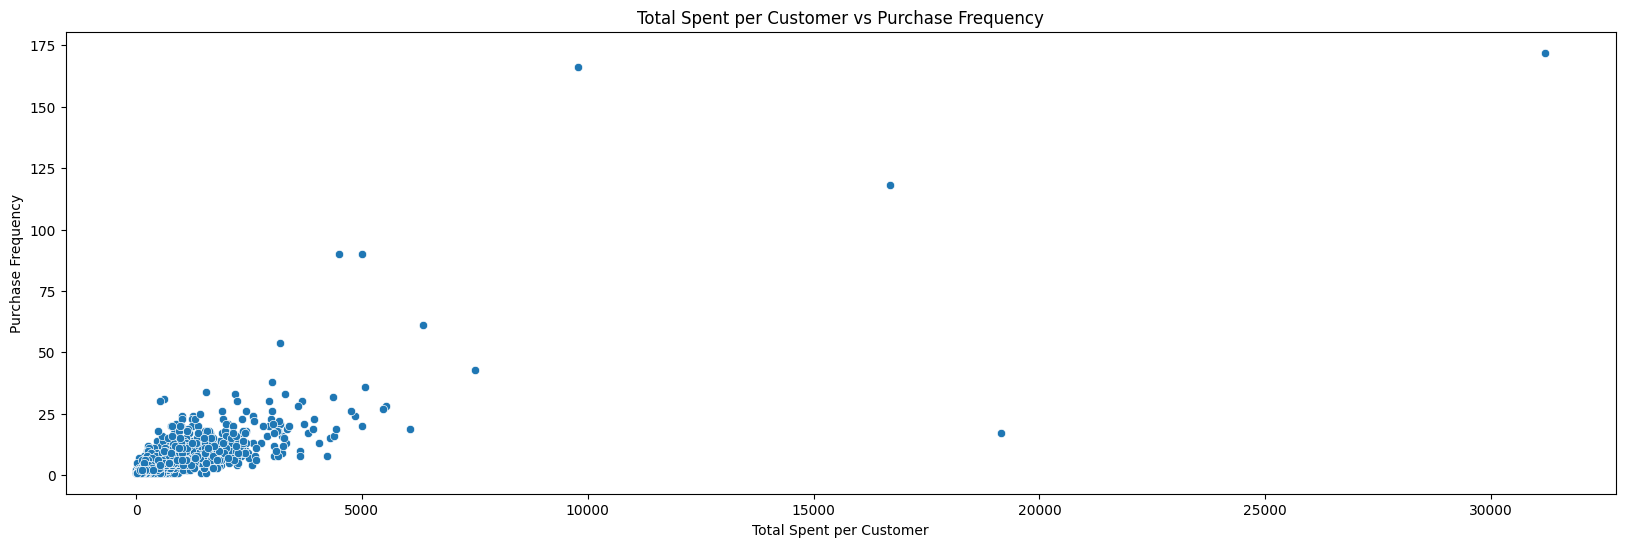

In [39]:
# Plot Total Spent per Customer vs Purchase Frequency

customer_data =pd.merge(customer_spend,purchase_frequency,on='CustomerID')
#customer_data = customer_data[customer_data['Total_spent']<customer_data['Total_spent'].quantile(0.99)]
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Total_spent', y='InvoiceNo', data=customer_data)
plt.title('Total Spent per Customer vs Purchase Frequency')
plt.xlabel('Total Spent per Customer')
plt.ylabel('Purchase Frequency')
plt.show()


# Distribution of UnitPrice: Insights into Pricing Trends and Outliers

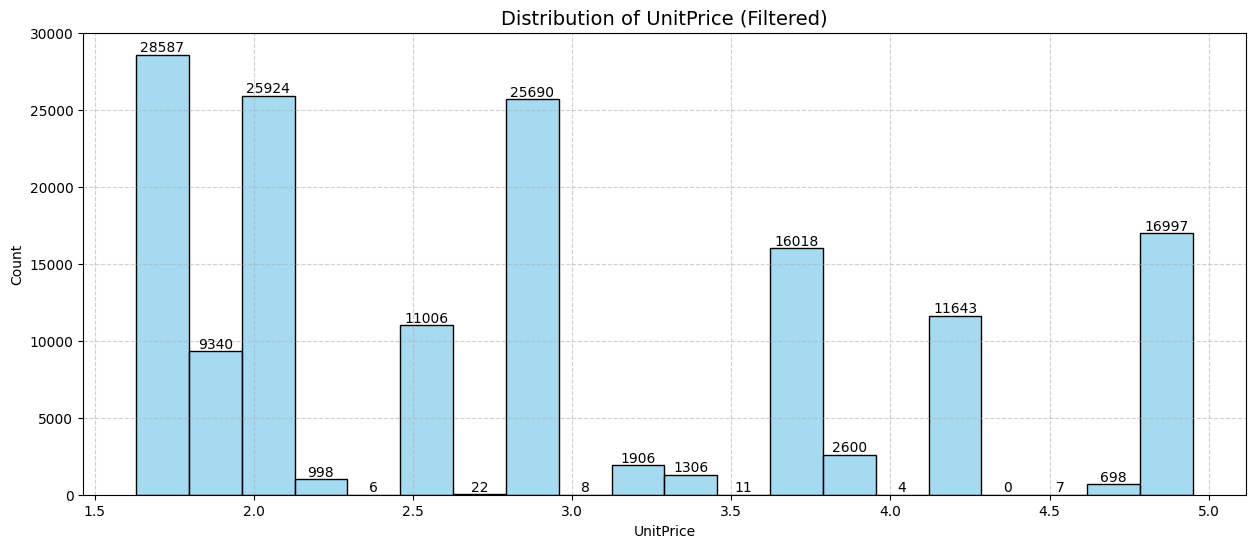

In [40]:
temp = ecommerce_dataset_cleaned
#temp= temp[temp['UnitPrice']<temp['UnitPrice'].quantile(0.99)]
plt.figure(figsize=(15, 6))
ax= sns.histplot(temp['UnitPrice'], bins=20, kde=False, color='skyblue', edgecolor='black')
max_quantity_purchased = df_filtered['UnitPrice'].max()

# Annotate each bar with the count value
for p in ax.patches:
    # Get the height of each bar (count value)
    height = p.get_height()
    
    # Annotate the bar with the count value
    ax.text(p.get_x() + p.get_width() / 2, height + 0.2, int(height), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of UnitPrice (Filtered)', fontsize=14)
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Monthly Total Spend Trend: A Comparison of 2010 and 2011

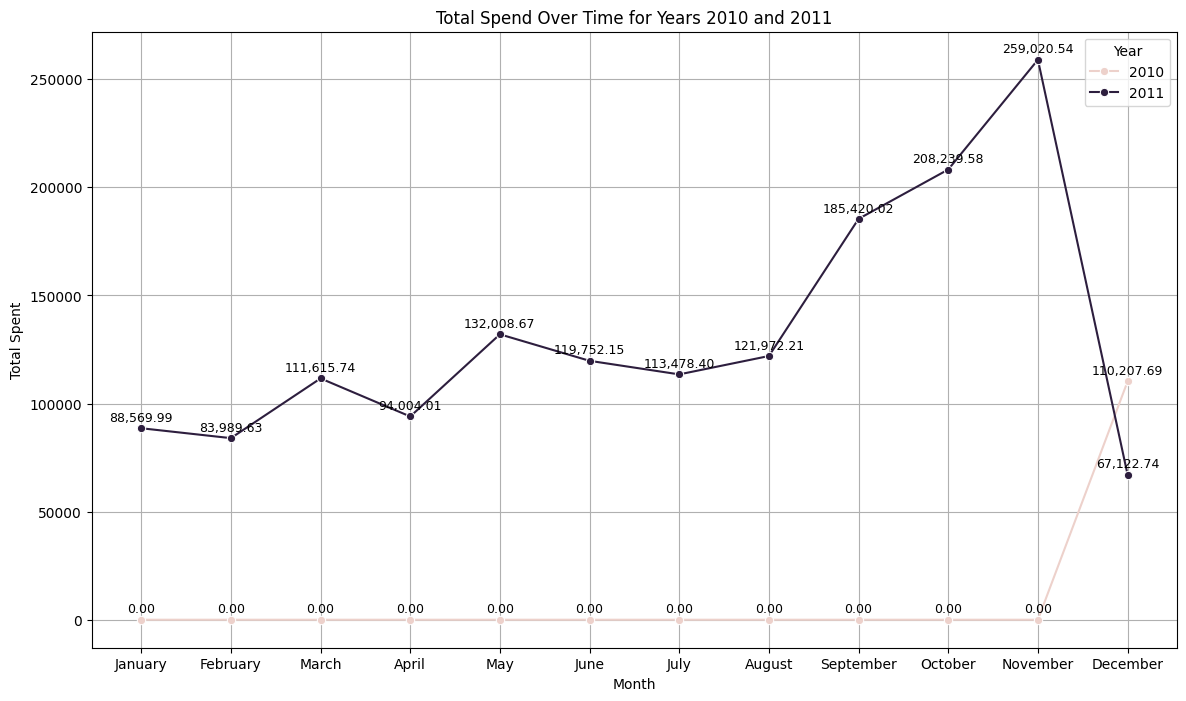

In [41]:
# Extract year, month, and day of the week from InvoiceDate
# Ensure datetime conversion
time_df = ecommerce_dataset_cleaned.copy()
time_df['InvoiceDate'] = pd.to_datetime(time_df['InvoiceDate'], errors='coerce')

time_df['Year'] = ecommerce_dataset_cleaned['InvoiceDate'].dt.year
time_df['Month'] = time_df['InvoiceDate'].apply(lambda x: x.strftime('%B') if pd.notnull(x) else None)
time_df['DayOfWeek'] = time_df['InvoiceDate'].apply(lambda x: x.weekday() if pd.notnull(x) else None)

# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to a categorical type with a defined order
time_df['Month'] = pd.Categorical(time_df['Month'], categories=month_order, ordered=True)

# Plot purchases over time
monthly_sales = time_df.groupby(['Year', 'Month'],observed=False)['Total_spent'].sum().reset_index()
df_sorted = monthly_sales.sort_values(by=['Year', 'Month']).reset_index(drop=True)

plt.figure(figsize=(14, 8))
ax = sns.lineplot(x='Month', y='Total_spent', hue='Year', data=df_sorted, marker='o')

# Adding annotations directly on the plot
for line in ax.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{y_value:,.2f}', xy=(x_value, y_value), textcoords='offset points', 
                    xytext=(0, 5), ha='center', fontsize=9)
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.title('Total Spend Over Time for Years 2010 and 2011')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Year')
plt.grid(True)
plt.show()


# Box Plot Analysis of derived feature'Total Spent': Distribution, Variability, and Outliers

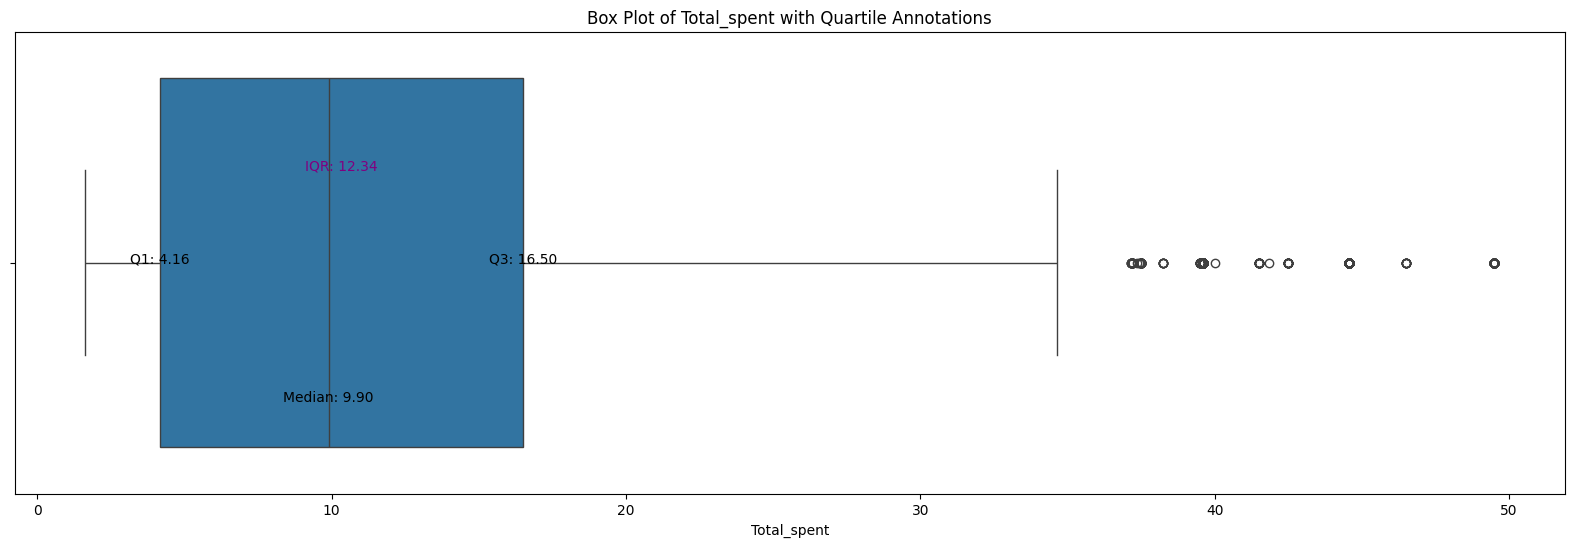

In [42]:
data = ecommerce_dataset_cleaned['Total_spent']

# Calculate Q1, Q2, Q3, and IQR
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Plot box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x=data)
plt.title('Box Plot of Total_spent with Quartile Annotations')

# Annotate Q1, Q2, Q3, and IQR
plt.text(Q1, 0, f'Q1: {Q1:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(Q2, 0.3, f'Median: {Q2:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(Q3, 0, f'Q3: {Q3:.2f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(Q1 + IQR/2, -0.2, f'IQR: {IQR:.2f}', horizontalalignment='center', color='purple', fontsize=10)

# Display the plot
plt.show()

# Pairwise Relationships Among Key Features: Total Spent, Purchase Frequency, Product Diversity, and Average Order Value

In [77]:
# Prepare the features for clustering
features = customer_spend.merge(purchase_frequency, on='CustomerID')
features = features.merge(product_diversity, on='CustomerID')
features = features.merge(avg_order_value, on='CustomerID')
features.columns = ['CustomerID','Total_spent', 'Purchase_Frequency', 'Product_Diversity', 'AvgOrderValue']


In [78]:
features = features.dropna(subset=['AvgOrderValue'])

In [79]:
features = features[features['Total_spent']<features['Total_spent'].quantile(0.99)]

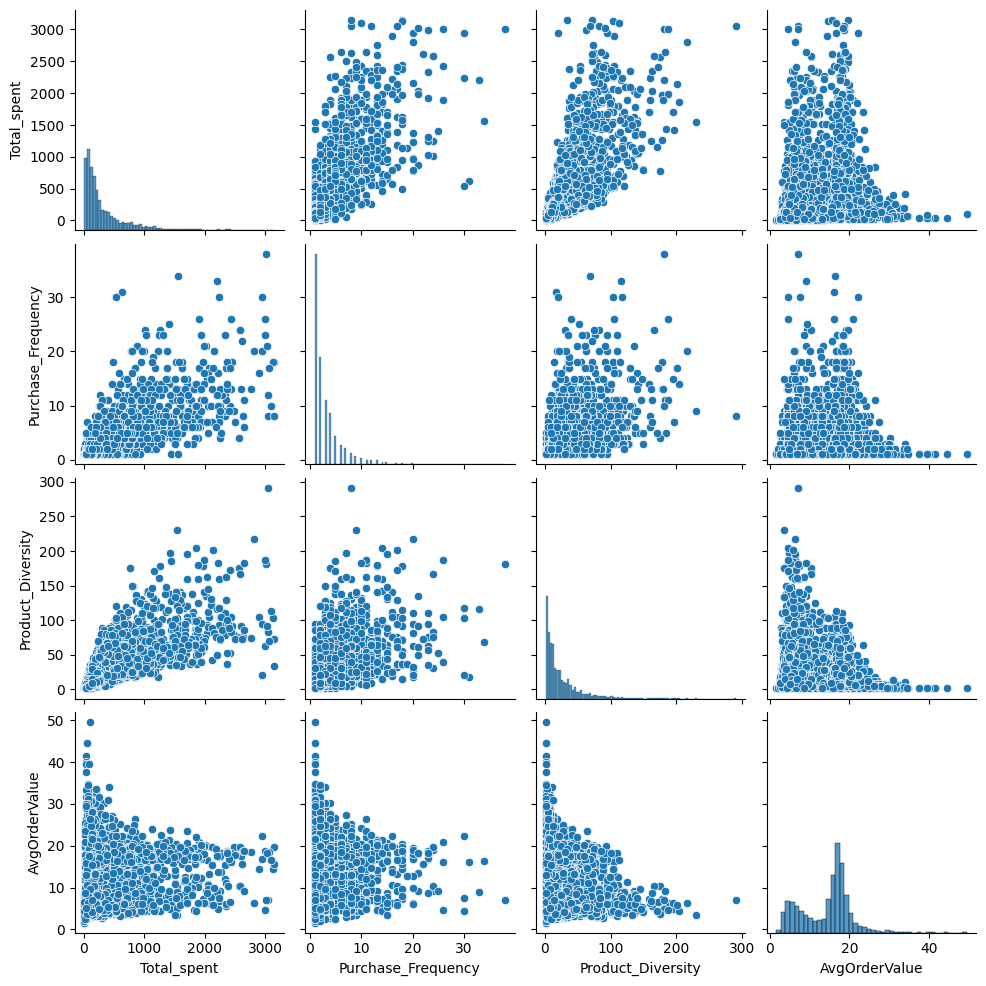

In [80]:
sns.pairplot(features[['Total_spent', 'Purchase_Frequency', 'Product_Diversity', 'AvgOrderValue']])
plt.show()


# ML Capstone 1 - Part 2 E-Commerce Customer Segmentation

 ## TODO
 
 ### Feature Selection
- Selecting relevant features for segmentation and classification based on EDA insights
- Scaling numerical features and encoding categorical variables

### Model Preparation
- Preparing the dataset for clustering algorithms and classification models


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

# Customer Segmentation using K-Means Clustering

# Univariant Clustering

In [81]:
features.head()

,CustomerID,Total_spent,Purchase_Frequency,Product_Diversity,AvgOrderValue
0,12347.0,1255.97,7,33,19.322615
1,12349.0,411.02,1,24,17.125833
2,12350.0,17.7,1,1,17.7
3,12352.0,522.28,7,23,16.32125
4,12353.0,17.7,1,1,17.7


In [82]:
OneFeature = features

In [83]:
intertia_scores = []
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(OneFeature[['Total_spent']])
    intertia_scores.append(kmeans1.inertia_)

intertia_scores

[876202247.757481,
 278618232.66232646,
 124728654.6741797,
 75879126.37016118,
 51162180.54335394,
 34552986.01322516,
 25180717.831281777,
 19645081.157159865,
 15970776.258891564,
 13050183.052372675]

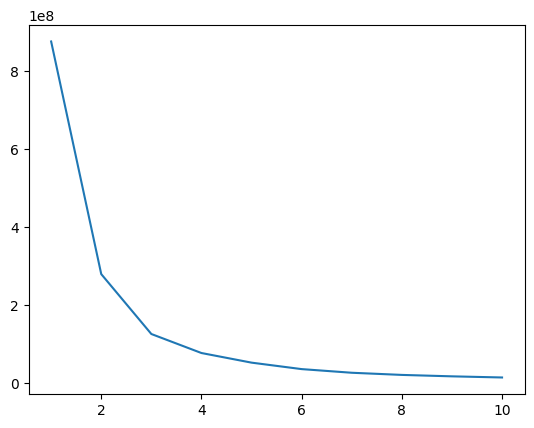

In [84]:
plt.plot(range(1,11),intertia_scores)

In [85]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(OneFeature[['Total_spent']])
OneFeature['Total_spent_cluster'] = clustering1.labels_
OneFeature.head()
clustering1.inertia_

124726778.07373443

In [86]:
OneFeature['Total_spent_cluster'].value_counts()

Total_spent_cluster
0    2958
2     734
1     197
Name: count, dtype: int64

In [87]:
OneFeature.groupby('Total_spent_cluster', observed=False)[['Purchase_Frequency','Product_Diversity']].sum().reset_index()

,Total_spent_cluster,Purchase_Frequency,Product_Diversity
0,0,6023,40673
1,1,2284,18322
2,2,4634,36169


In [88]:
OneFeature.groupby('Total_spent_cluster', observed=False)[['CustomerID']].count()

,CustomerID
Total_spent_cluster,
0,2958
1,197
2,734


# Bivariant Clustering

In [89]:
features.head()

,CustomerID,Total_spent,Purchase_Frequency,Product_Diversity,AvgOrderValue,Total_spent_cluster
0,12347.0,1255.97,7,33,19.322615,2
1,12349.0,411.02,1,24,17.125833,0
2,12350.0,17.7,1,1,17.7,0
3,12352.0,522.28,7,23,16.32125,2
4,12353.0,17.7,1,1,17.7,0


In [90]:
TwoFeatures = features

In [91]:
intertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(TwoFeatures[['Total_spent','Purchase_Frequency']])
    intertia_scores2.append(kmeans2.inertia_)

intertia_scores2

[876252788.4070058,
 278649364.61719275,
 124742824.48876852,
 75925371.46714216,
 51170916.95328932,
 35339325.4110773,
 25153313.972598076,
 19686532.520107023,
 15541730.618799005,
 12406517.878506787]

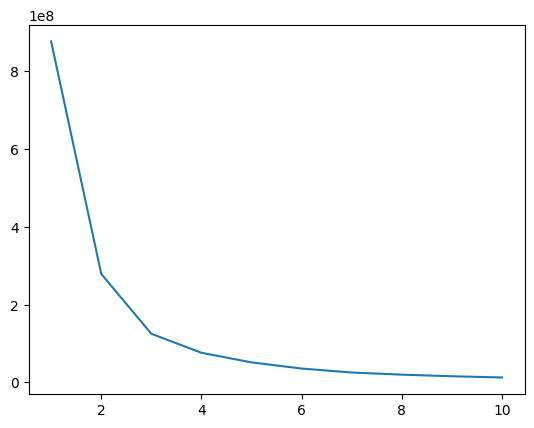

In [92]:
plt.plot(range(1,11),intertia_scores2)

In [93]:
Clustering2 = KMeans(n_clusters=3)
Clustering2.fit(TwoFeatures[['Total_spent','Purchase_Frequency']])
TwoFeatures['total_spent and purchase_freq cluster']=Clustering2.labels_
TwoFeatures.head()

,CustomerID,Total_spent,Purchase_Frequency,Product_Diversity,AvgOrderValue,Total_spent_cluster,total_spent and purchase_freq cluster
0,12347.0,1255.97,7,33,19.322615,2,0
1,12349.0,411.02,1,24,17.125833,0,1
2,12350.0,17.7,1,1,17.7,0,1
3,12352.0,522.28,7,23,16.32125,2,0
4,12353.0,17.7,1,1,17.7,0,1


In [94]:
Clustering2.inertia_

124744371.97424074

In [95]:
centers = pd.DataFrame(Clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,802.764087,6.313351
1,166.826484,2.036173
2,1950.516802,11.593909


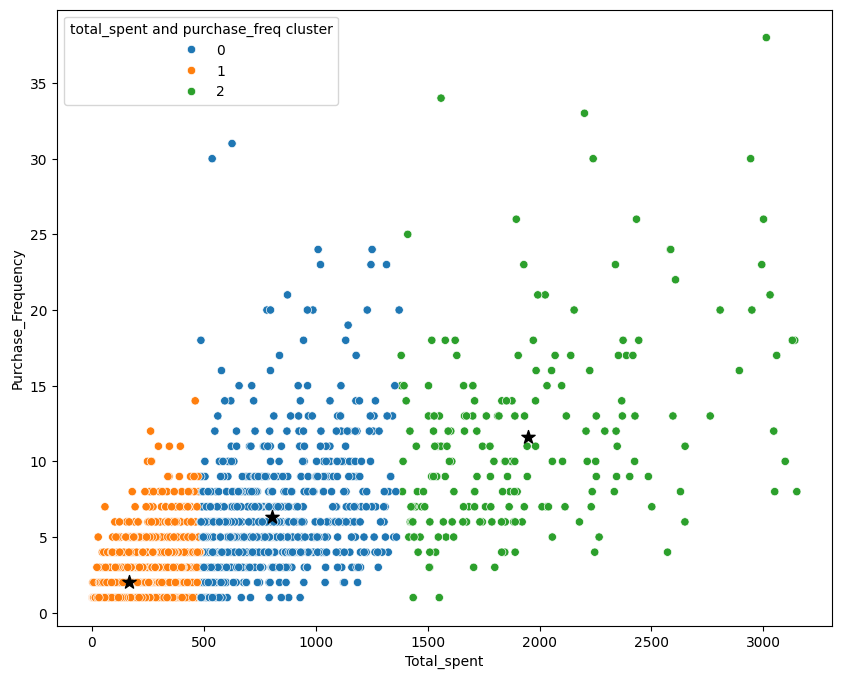

In [96]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=TwoFeatures, x='Total_spent',y='Purchase_Frequency',hue='total_spent and purchase_freq cluster',palette='tab10')
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')

In [97]:
TwoFeatures.groupby('total_spent and purchase_freq cluster')[['CustomerID']].count()

,CustomerID
total_spent and purchase_freq cluster,
0,736
1,2956
2,197


# Multi-variant Clustering

In [98]:
features.head()

,CustomerID,Total_spent,Purchase_Frequency,Product_Diversity,AvgOrderValue,Total_spent_cluster,total_spent and purchase_freq cluster
0,12347.0,1255.97,7,33,19.322615,2,0
1,12349.0,411.02,1,24,17.125833,0,1
2,12350.0,17.7,1,1,17.7,0,1
3,12352.0,522.28,7,23,16.32125,2,0
4,12353.0,17.7,1,1,17.7,0,1


In [99]:
Multi_variant = features

In [100]:
# Scaling the data
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Total_spent', 'Purchase_Frequency', 'Product_Diversity', 'AvgOrderValue']])
scaled_features

array([[ 1.85135261,  1.01870784,  0.2968207 ,  0.83254195],
       [ 0.07123867, -0.64566191, -0.01635632,  0.47199646],
       [-0.75739547, -0.64566191, -0.81669759,  0.56623121],
       ...,
       [-0.60939499, -0.36826695, -0.67750781,  0.54817753],
       [ 2.37372582,  3.2378675 ,  3.77656536, -1.75799395],
       [-0.50289785, -0.36826695, -0.53831802,  0.18692154]])

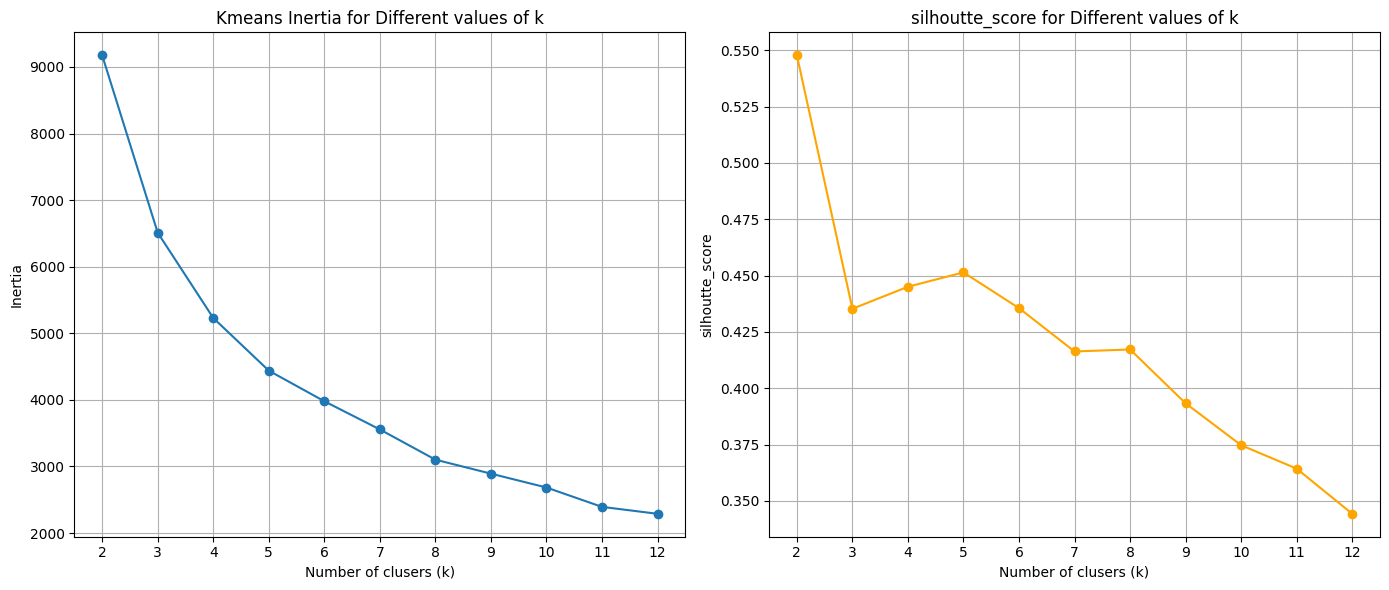

In [101]:
from sklearn.metrics import silhouette_score# type: ignore
max_k =12
inertia = []
silhoutte = []
k_values = range(2, max_k +1)

for k in k_values:
    
    kmeans3 = KMeans(n_clusters=k,random_state=42,max_iter=1000)

    cluster_labels = kmeans3.fit_predict(scaled_features)

    sil_score = silhouette_score(scaled_features,cluster_labels)

    silhoutte.append(sil_score)

    inertia.append(kmeans3.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.title('Kmeans Inertia for Different values of k')
plt.xlabel('Number of clusers (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhoutte, marker='o',color='orange')
plt.title('silhoutte_score for Different values of k')
plt.xlabel('Number of clusers (k)')
plt.ylabel('silhoutte_score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [102]:
clustering3 =KMeans(n_clusters=4,random_state=42, max_iter=1000)
Multi_variant['multi_feature_cluster'] = clustering3.fit_predict(scaled_features)
Multi_variant.head()

,CustomerID,Total_spent,Purchase_Frequency,Product_Diversity,AvgOrderValue,Total_spent_cluster,total_spent and purchase_freq cluster,multi_feature_cluster
0,12347.0,1255.97,7,33,19.322615,2,0,2
1,12349.0,411.02,1,24,17.125833,0,1,1
2,12350.0,17.7,1,1,17.7,0,1,1
3,12352.0,522.28,7,23,16.32125,2,0,2
4,12353.0,17.7,1,1,17.7,0,1,1


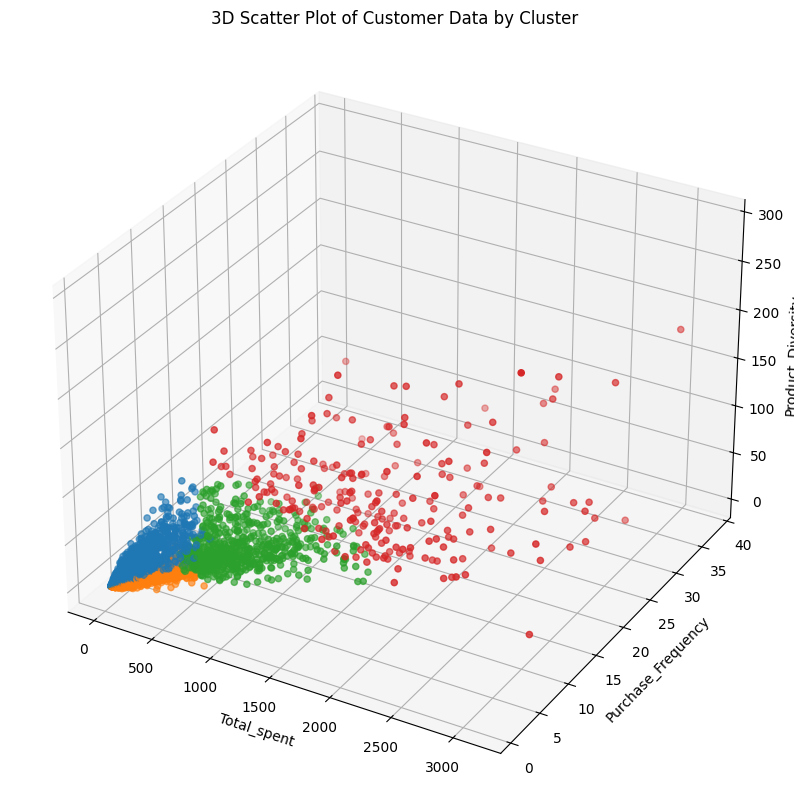

In [103]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = Multi_variant['multi_feature_cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(Multi_variant['Total_spent'],
                     Multi_variant['Purchase_Frequency'],
                     Multi_variant['Product_Diversity'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Total_spent')
ax.set_ylabel('Purchase_Frequency')
ax.set_zlabel('Product_Diversity')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

C:\Users\dhawa\AppData\Local\Temp\ipykernel_4956\1905218000.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=Multi_variant['multi_feature_cluster'], y=Multi_variant['Total_spent'], palette=cluster_colors)
C:\Users\dhawa\AppData\Local\Temp\ipykernel_4956\1905218000.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=Multi_variant['multi_feature_cluster'], y=Multi_variant['Purchase_Frequency'], palette=cluster_colors)
C:\Users\dhawa\AppData\Local\Temp\ipykernel_4956\1905218000.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinp

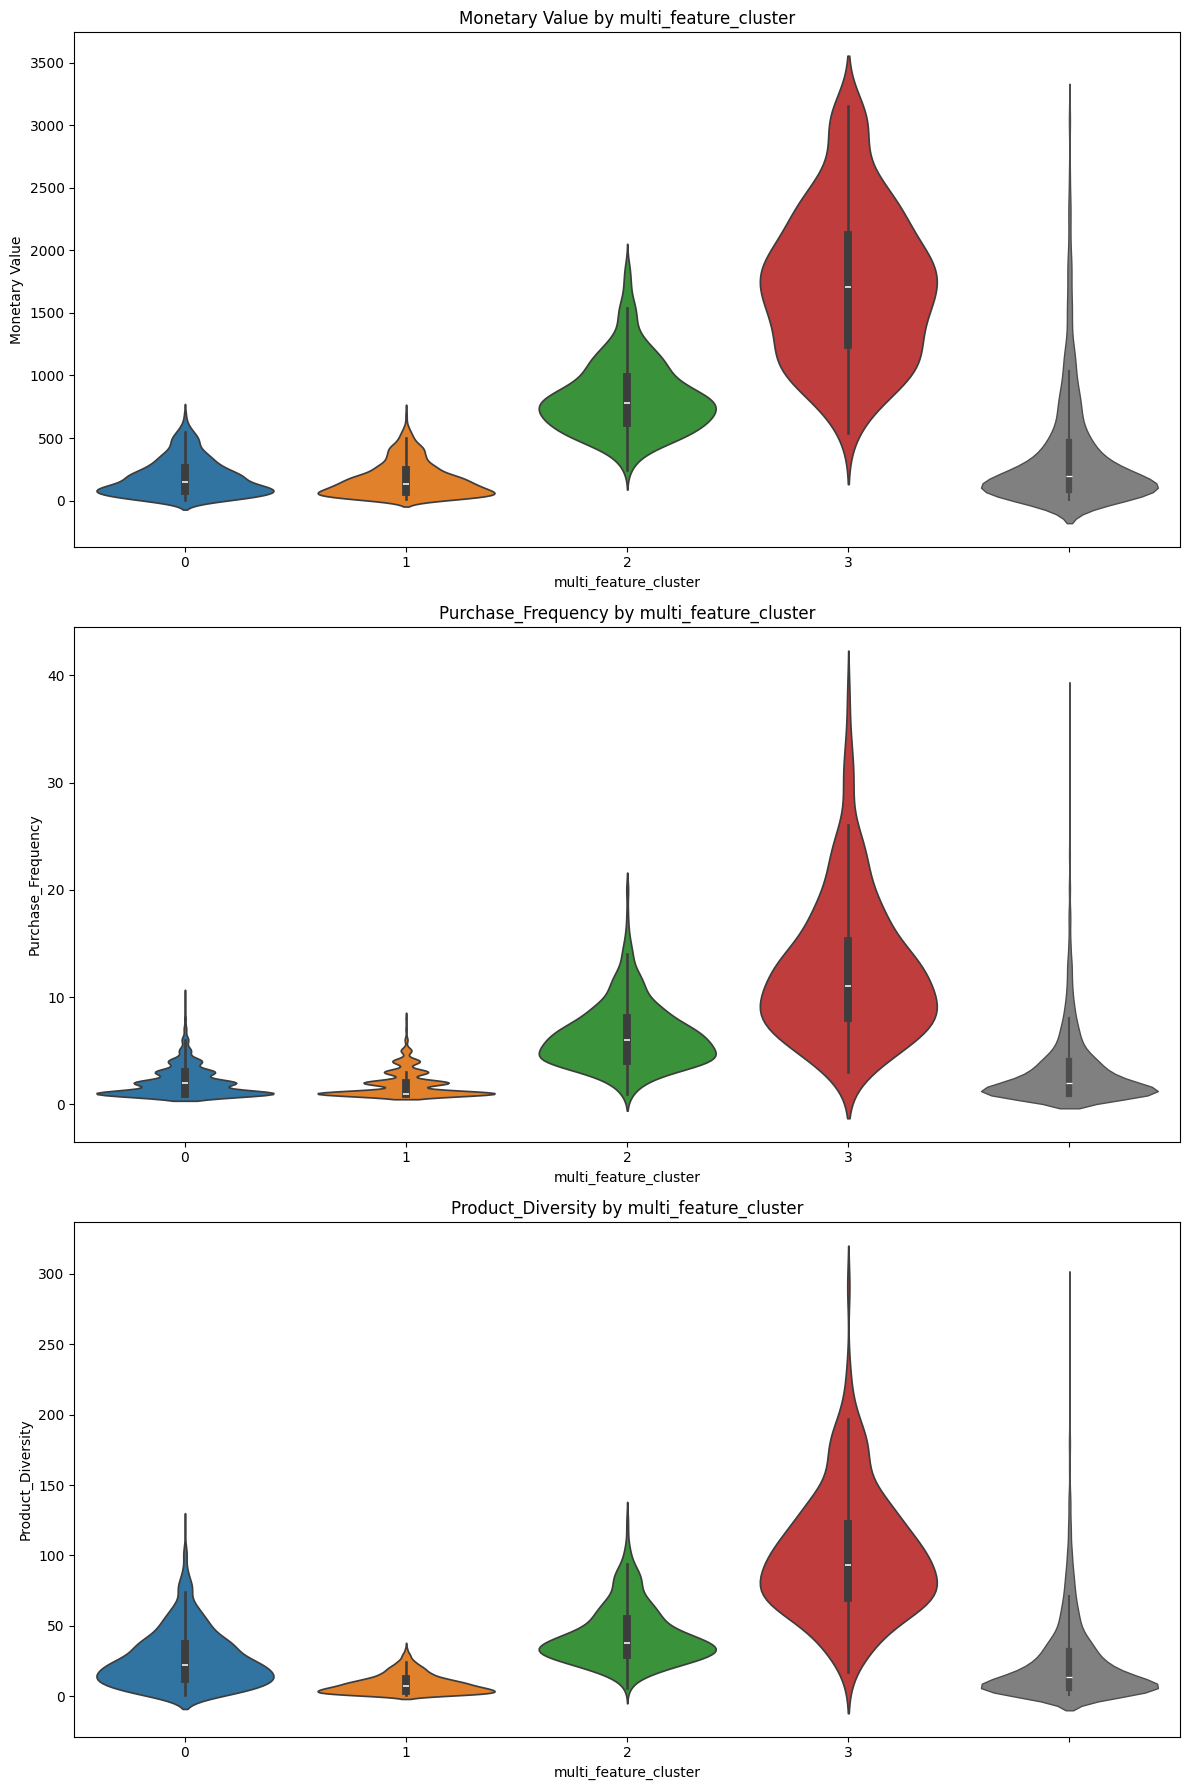

In [104]:
cluster_colors = {'0': '#1f77b4',  # Blue
                  '1': '#ff7f0e',  # Orange
                  '2': '#2ca02c',  # Green
                  '3': '#d62728'}  # Red

plt.figure(figsize=(12, 18))


plt.subplot(3, 1, 1)
sns.violinplot(x=Multi_variant['multi_feature_cluster'], y=Multi_variant['Total_spent'], palette=cluster_colors)
sns.violinplot(y=Multi_variant['Total_spent'], color='gray', linewidth=1.0)
plt.title('Monetary Value by multi_feature_cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=Multi_variant['multi_feature_cluster'], y=Multi_variant['Purchase_Frequency'], palette=cluster_colors)
sns.violinplot(y=Multi_variant['Purchase_Frequency'], color='gray', linewidth=1.0)
plt.title('Purchase_Frequency by multi_feature_cluster')
plt.ylabel('Purchase_Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=Multi_variant['multi_feature_cluster'], y=Multi_variant['Product_Diversity'], palette=cluster_colors)
sns.violinplot(y=Multi_variant['Product_Diversity'], color='gray', linewidth=1.0)
plt.title('Product_Diversity by multi_feature_cluster')
plt.ylabel('Product_Diversity')

plt.tight_layout()
plt.show()